In [1]:
# Collect informations about protocols
%matplotlib inline

import os
import glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

hist = [[] for i in range(81)]

dirName = 'uniform_200k/'
datasetName = ''

for file in os.scandir(dirName):
    if file.name.startswith('dataset') and file.name.endswith('.csv'):
        datasetName = file.path

data = pd.read_csv(datasetName) 

for i in tqdm(range(data.shape[0])): # Iterate over last column    
    tmp = data.iloc[i]
    dose = []
    for j in range(2, 41, 2):
        if tmp[j] != 0.0:
            dose.append(tmp[j])

    hist[int(sum(dose)/0.125)].append(round(tmp[-1]))        

100%|██████████| 10000/10000 [00:07<00:00, 1359.27it/s]


/home/michal/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/michal/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/michal/.local/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/michal/.local/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/michal/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


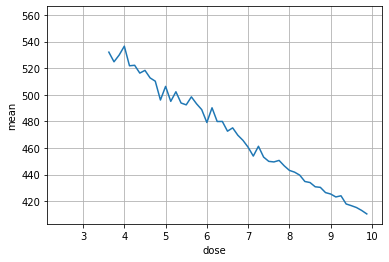

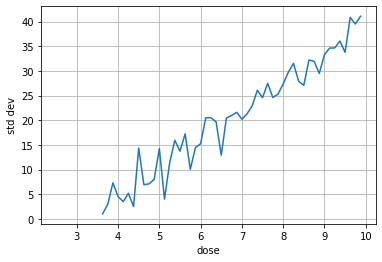

In [2]:
# Mean and standard deviation of results of protocols with specific sum of Gy
%matplotlib inline

s = np.arange(0.625, 10.0, 0.125)
av = list(map(np.mean, hist[6:]))
fig, ax_mean = plt.subplots()
ax_mean.plot(s, av)

ax_mean.set(xlabel='dose', ylabel='mean')
ax_mean.grid()

stddev = list(map(np.std, hist[6:]))
fig_s, ax_std = plt.subplots()
ax_std.grid()
ax_std.plot(s, stddev)
ax_std.set(xlabel='dose', ylabel='std dev')
plt.show()

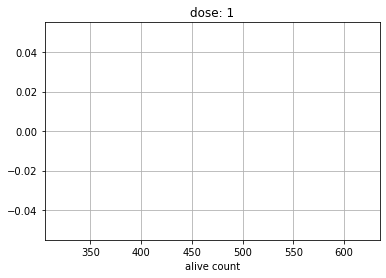

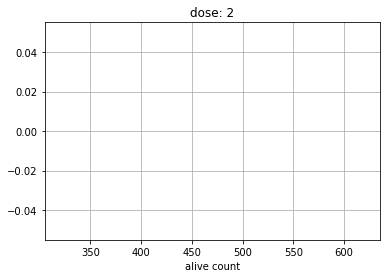

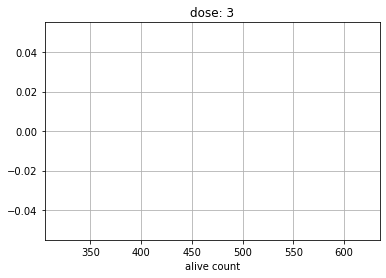

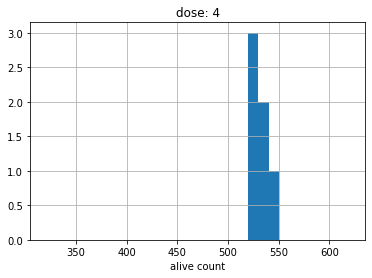

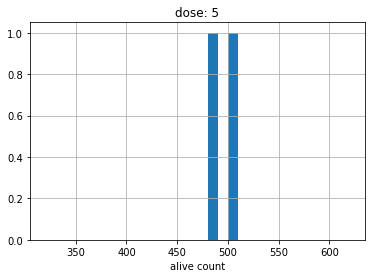

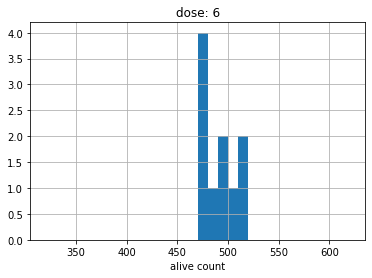

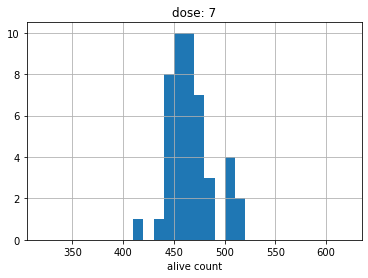

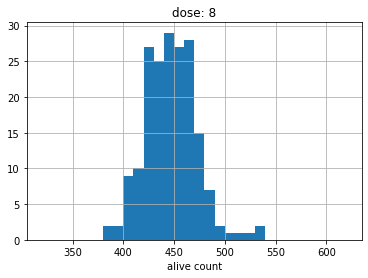

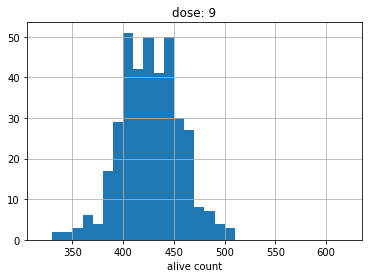

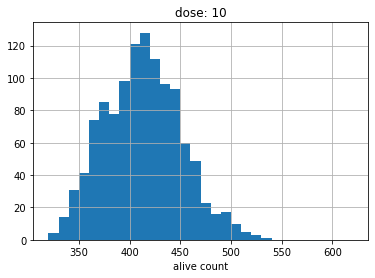

interactive(children=(FloatSlider(value=5.25, description='x', max=10.0, min=0.625, step=0.125), Output()), _d…

In [3]:
# Distribution of results of protocols with specific sum of Gy
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

for s in range(1, 11):
    bins = np.arange(320, 630, 10)
    fig2, h = plt.subplots()
    h.hist(hist[s * 8], bins=bins)
    h.set_title('dose: {}'.format(s))
    h.grid()
    h.set(xlabel='alive count')

def f(x):
    bins = np.arange(200, 700, 10)
    plt.hist(hist[int(x * 8)], bins=bins)
    plt.ylim(0, 150)
    plt.title('doses: {}'.format(x))
    plt.ylabel('alive count')


interact(f, x=(0.625, 10.0, 0.125));